https://github.com/BAMresearch/NFDI4IngScientificWorkflowRequirements

In [1]:
!conda env list


# conda environments:
#
base                 * /home/janssen/mambaforge
postprocessing         /home/janssen/mambaforge/envs/postprocessing
preprocessing          /home/janssen/mambaforge/envs/preprocessing
processing             /home/janssen/mambaforge/envs/processing



# Preprocessing 

In [2]:
from nfdi_ing_workflow import (
    generate_mesh as _generate_mesh, 
    convert_to_xdmf as _convert_to_xdmf,
    poisson as _poisson,
    plot_over_line as _plot_over_line,
    substitute_macros as _substitute_macros,
    compile_paper as _compile_paper,
)

In [3]:
from jobflow import job, Flow

In [4]:
generate_mesh = job(_generate_mesh)
convert_to_xdmf = job(_convert_to_xdmf, data=["xdmf_file", "h5_file"])
poisson = job(_poisson, data=["numdofs", "pvd_file", "vtu_file"])
plot_over_line = job(_plot_over_line)
substitute_macros = job(_substitute_macros)
compile_paper = job(_compile_paper)

In [5]:
domain_size = 2.0

## generate mesh

In [6]:
gmsh_output_file = generate_mesh(
    domain_size=domain_size,
)

## convert to xdmf

In [7]:
meshio_output_dict = convert_to_xdmf(
    gmsh_output_file=gmsh_output_file.output,
)

# Processing

## poisson

In [8]:
poisson_dict = poisson(
    meshio_output_xdmf=meshio_output_dict.output.xdmf_file, 
    meshio_output_h5=meshio_output_dict.output.h5_file,
)

# Postprocessing

## plot over line

In [9]:
pvbatch_output_file = plot_over_line(
    poisson_output_pvd_file=poisson_dict.output.pvd_file, 
    poisson_output_vtu_file=poisson_dict.output.vtu_file,
)

## substitute macros

In [10]:
macros_tex_file = substitute_macros( 
    pvbatch_output_file=pvbatch_output_file.output, 
    ndofs=poisson_dict.output.numdofs, 
    domain_size=domain_size,
)

## compile paper

In [11]:
paper_output = compile_paper(
    macros_tex=macros_tex_file.output, 
    plot_file=pvbatch_output_file.output,
)

In [12]:
flow = Flow([gmsh_output_file, meshio_output_dict, poisson_dict, pvbatch_output_file, macros_tex_file, paper_output])

# Convert 

In [13]:
from python_workflow_definition.jobflow import write_workflow_json

In [14]:
workflow_json_filename = "jobflow_nfdi.json"

In [15]:
write_workflow_json(flow=flow, file_name=workflow_json_filename)

# Load Workflow with aiida

In [ ]:
from aiida import load_profile

load_profile()

In [ ]:
from python_workflow_definition.aiida import load_workflow_json

In [ ]:
wg = load_workflow_json(file_name=workflow_json_filename)
wg

In [ ]:
wg.run()

# Load Workflow with pyiron_base

In [16]:
from pyiron_base import Project

In [17]:
from python_workflow_definition.pyiron_base import load_workflow_json

In [18]:
pr = Project("test")
pr.remove_jobs(recursive=True, silently=True)

0it [00:00, ?it/s]

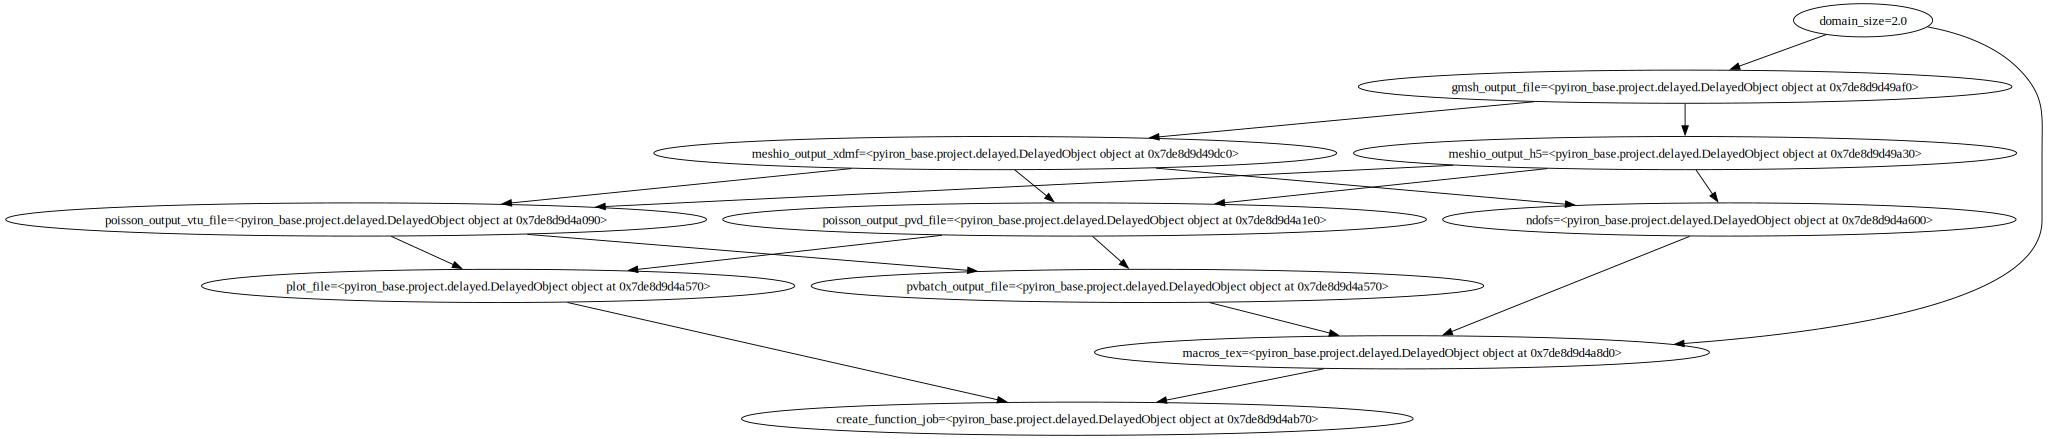

In [19]:
delayed_object = load_workflow_json(project=pr, file_name=workflow_json_filename)
delayed_object.draw()

In [20]:
delayed_object.pull()

The job generate_mesh_0b48cf5155cd6802c17d20bb58104132 was saved and received the ID: 2005
The job convert_to_xdmf_9ded0361e4866afe4962398287e4f6ae was saved and received the ID: 2006
The job poisson_2d98621ac2c8e43a266693cf65647173 was saved and received the ID: 2007
The job plot_over_line_004790462b53a54f512cc7e1a2a10519 was saved and received the ID: 2008
The job substitute_macros_52130ff9ec1931ec82532a7119df653f was saved and received the ID: 2009
The job compile_paper_b65627cdc212fc76a216689a26379fae was saved and received the ID: 2010


'/home/janssen/notebooks/2025/2025-04-02-nfdi-pwd/postprocessing/paper.pdf'

In [21]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,2005,finished,None,generate_mesh_0b48cf5155cd6802c17d20bb58104132,/generate_mesh_0b48cf5155cd6802c17d20bb58104132,None,/home/janssen/notebooks/2025/2025-04-02-nfdi-pwd/test/,2025-04-02 15:02:38.490191,None,None,pyiron@cmpc06#1,PythonFunctionContainerJob,0.4,None,None
1,2006,finished,None,convert_to_xdmf_9ded0361e4866afe4962398287e4f6ae,/convert_to_xdmf_9ded0361e4866afe4962398287e4f6ae,None,/home/janssen/notebooks/2025/2025-04-02-nfdi-pwd/test/,2025-04-02 15:02:45.247485,None,None,pyiron@cmpc06#1,PythonFunctionContainerJob,0.4,None,None
2,2007,finished,None,poisson_2d98621ac2c8e43a266693cf65647173,/poisson_2d98621ac2c8e43a266693cf65647173,None,/home/janssen/notebooks/2025/2025-04-02-nfdi-pwd/test/,2025-04-02 15:02:52.878817,None,None,pyiron@cmpc06#1,PythonFunctionContainerJob,0.4,None,None
3,2008,finished,None,plot_over_line_004790462b53a54f512cc7e1a2a10519,/plot_over_line_004790462b53a54f512cc7e1a2a10519,None,/home/janssen/notebooks/2025/2025-04-02-nfdi-pwd/test/,2025-04-02 15:03:02.977300,None,None,pyiron@cmpc06#1,PythonFunctionContainerJob,0.4,None,None
4,2009,finished,None,substitute_macros_52130ff9ec1931ec82532a7119df653f,/substitute_macros_52130ff9ec1931ec82532a7119df653f,None,/home/janssen/notebooks/2025/2025-04-02-nfdi-pwd/test/,2025-04-02 15:03:10.674995,None,None,pyiron@cmpc06#1,PythonFunctionContainerJob,0.4,None,None
5,2010,finished,None,compile_paper_b65627cdc212fc76a216689a26379fae,/compile_paper_b65627cdc212fc76a216689a26379fae,None,/home/janssen/notebooks/2025/2025-04-02-nfdi-pwd/test/,2025-04-02 15:03:16.820860,None,None,pyiron@cmpc06#1,PythonFunctionContainerJob,0.4,None,None
